In [1]:
import cohere
import pandas as pd
import numpy as np
import altair as alt
import textwrap as tr
import os

api_key = os.getenv('COHERE_API_KEY')
co = cohere.Client(api_key)

In [2]:
df = pd.read_csv('https://github.com/cohere-ai/notebooks/raw/main/notebooks/data/hello-world-kw.csv', names=["search_term"])
df.head()

,search_term
0,how to print hello world in python
1,what is hello world
2,how do you write hello world in an alert box
3,how to print hello world in java
4,how to write hello world in eclipse


In [3]:
# A function that classifies a list of inputs given the examples
def embed_text(texts):
    """
    Turns a piece of text into embeddings
    Arguments:
        text(str)
    Returns:
        embedding(list)
    """
    output = co.embed(
        model="embed-english-v3.0",
        input_type="search_document",
        texts=texts)
    embedding = output.embeddings

    return embedding
    

In [4]:
df["search_term_embeds"] = embed_text(df["search_term"].tolist())
embeds = np.array(df["search_term_embeds"].tolist())

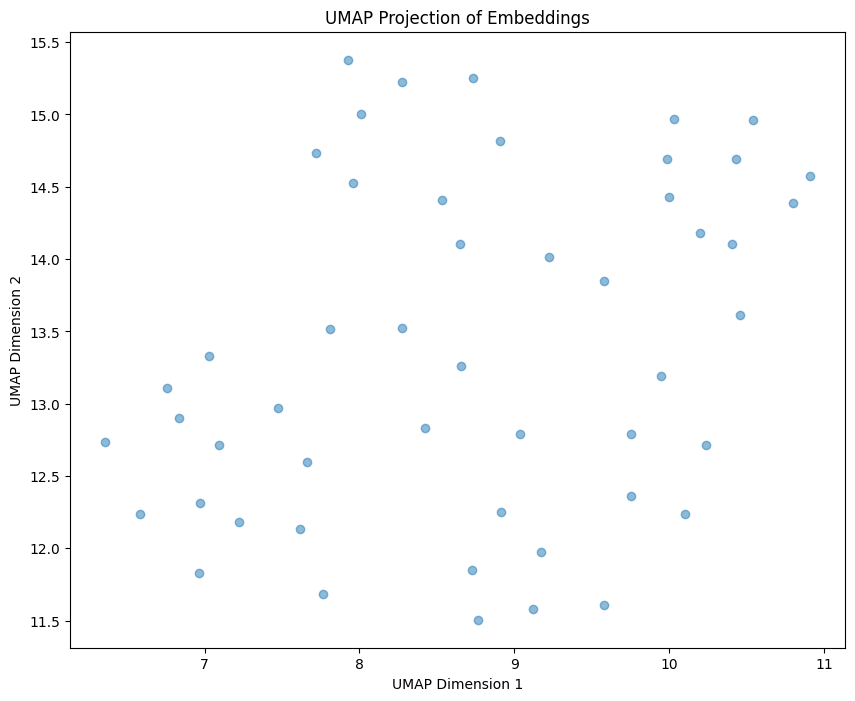

In [10]:
import matplotlib.pyplot as plt

# Plotting the reduced data
plt.figure(figsize=(10, 8))  # Set the size of the plot
plt.scatter(df['x'], df['y'], alpha=0.5)  # Create a scatter plot

plt.title('UMAP Projection of Embeddings')  # Add a title
plt.xlabel('UMAP Dimension 1')  # Label for x-axis
plt.ylabel('UMAP Dimension 2')  # Label for y-axis

plt.show()  # Display the plot
